In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer # fot handling missing values
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline


In [2]:
df = pd.read_csv('credit_risk.csv')
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [3]:
df.tail()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [4]:
rows,col = df.shape
print('Rows are:',df.shape[0])
print("Cols are:",df.shape[1])

Rows are: 32581
Cols are: 12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [6]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df.drop('Id',axis=1,inplace=True)

In [8]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [9]:
df.isna().sum()

Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

In [10]:
df.nunique()

Age                 58
Income            4295
Home                 4
Emp_length          36
Intent               6
Amount             753
Rate               348
Status               2
Percent_income      77
Default              2
Cred_length         29
dtype: int64

In [11]:
df['Default'].value_counts()

Default
N    26836
Y     5745
Name: count, dtype: int64

In [12]:
non_object_cols = df.select_dtypes(exclude=['object']).columns
duplicates_in_non_object_cols = df[non_object_cols].duplicated()
total = df[duplicates_in_non_object_cols].sum()
total

Age                                                           21702
Income                                                     52045968
Home              RENTRENTMORTGAGERENTMORTGAGERENTRENTRENTRENTRE...
Emp_length                                                   3602.0
Intent            HOMEIMPROVEMENTHOMEIMPROVEMENTEDUCATIONPERSONA...
Amount                                                      7391875
Rate                                                        7995.36
Status                                                          133
Percent_income                                               136.06
Default           YNNNNNNYNNYNNNNYNYNNNNYNNYNYYNNYNNNNNYYYNNNNNN...
Cred_length                                                    3908
dtype: object

In [13]:
df.drop_duplicates(keep=False,inplace = True)

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32251, dtype: bool

In [15]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


### Filling null values

In [16]:
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(df[col].mean(), inplace=True)
for col in df.columns:
    if df[col].dtype == 'object':
       df[col].fillna(df[col].mode()[0], inplace=True)
# # Handling missing values with SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
# data_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [17]:
df.isna().sum()

Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

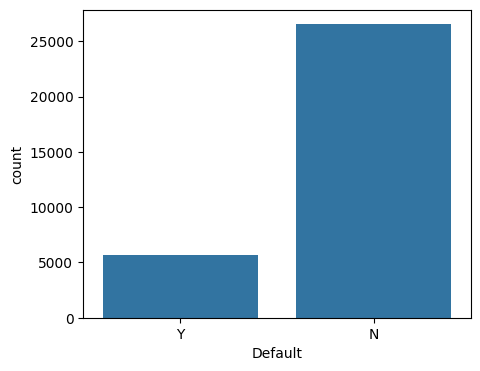

In [20]:
fig , ax = plt.subplots(figsize=(5, 4))
sns.countplot(data=df,x='Default')
plt.show()

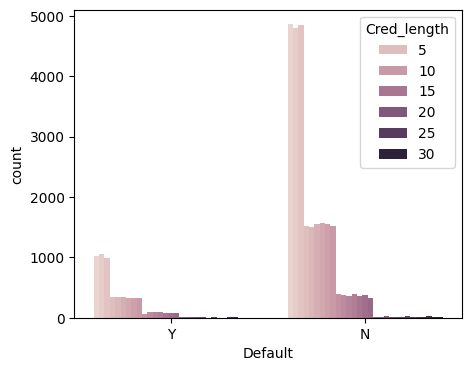

In [21]:
fig , ax = plt.subplots(figsize=(5, 4))
sns.countplot(data=df,x='Default',hue='Cred_length')
sns.color_palette(palette='Purples_d')
plt.show()

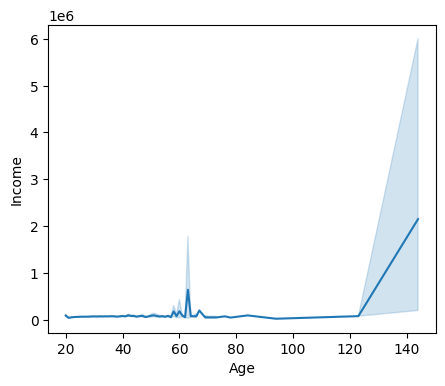

In [22]:
fig , ax = plt.subplots(figsize=(5, 4))
sns.lineplot(data=df,x='Age',y='Income',ax=ax)
# sns.color_palette(palette='Purples_d')
plt.show()

In [23]:
df['Intent'].value_counts()

Intent
EDUCATION            6369
MEDICAL              6013
VENTURE              5645
PERSONAL             5475
DEBTCONSOLIDATION    5166
HOMEIMPROVEMENT      3583
Name: count, dtype: int64

In [24]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


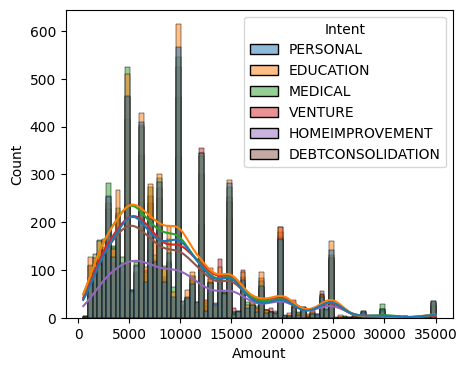

In [25]:
fig , ax = plt.subplots(figsize=(5, 4))
sns.histplot(data=df,x='Amount',hue='Intent',kde=True ,ax=ax)
# sns.color_palette(palette='Purples_d')
plt.show()

In [26]:
df['Home'].value_counts()

Home
RENT        16310
MORTGAGE    13294
OWN          2542
OTHER         105
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19656\570016455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Home"], palette="tab10")


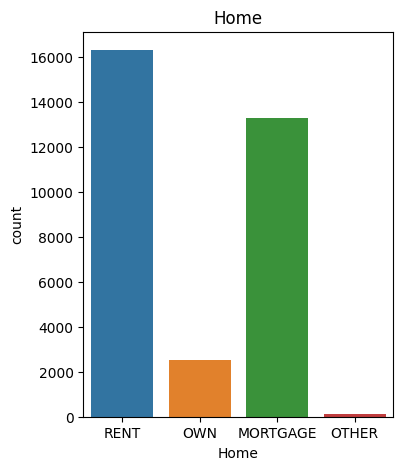

In [27]:
fig, ax = plt.subplots(figsize=(4,5))
sns.countplot(x=df["Home"], palette="tab10")
plt.title('Home')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19656\1846338554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Intent"],palette='Set2')


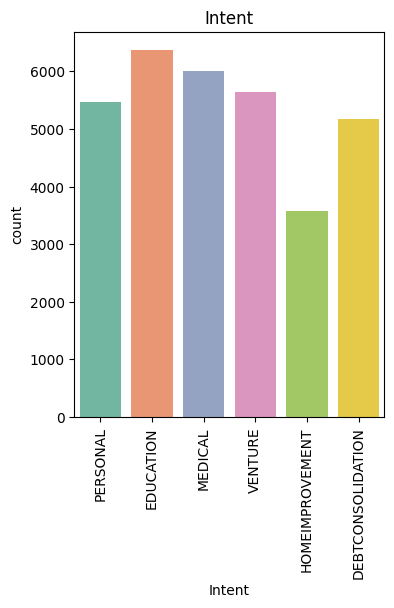

In [28]:
fig, ax = plt.subplots(figsize=(4,5))
sns.countplot(x=df["Intent"],palette='Set2')
plt.title('Intent')
plt.xticks(rotation=90)
plt.show()

### Converting object columns to numeric - "LabelEncoder"

In [29]:
lb = LabelEncoder()
objList = df.select_dtypes(include = "object").columns
for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

In [30]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4


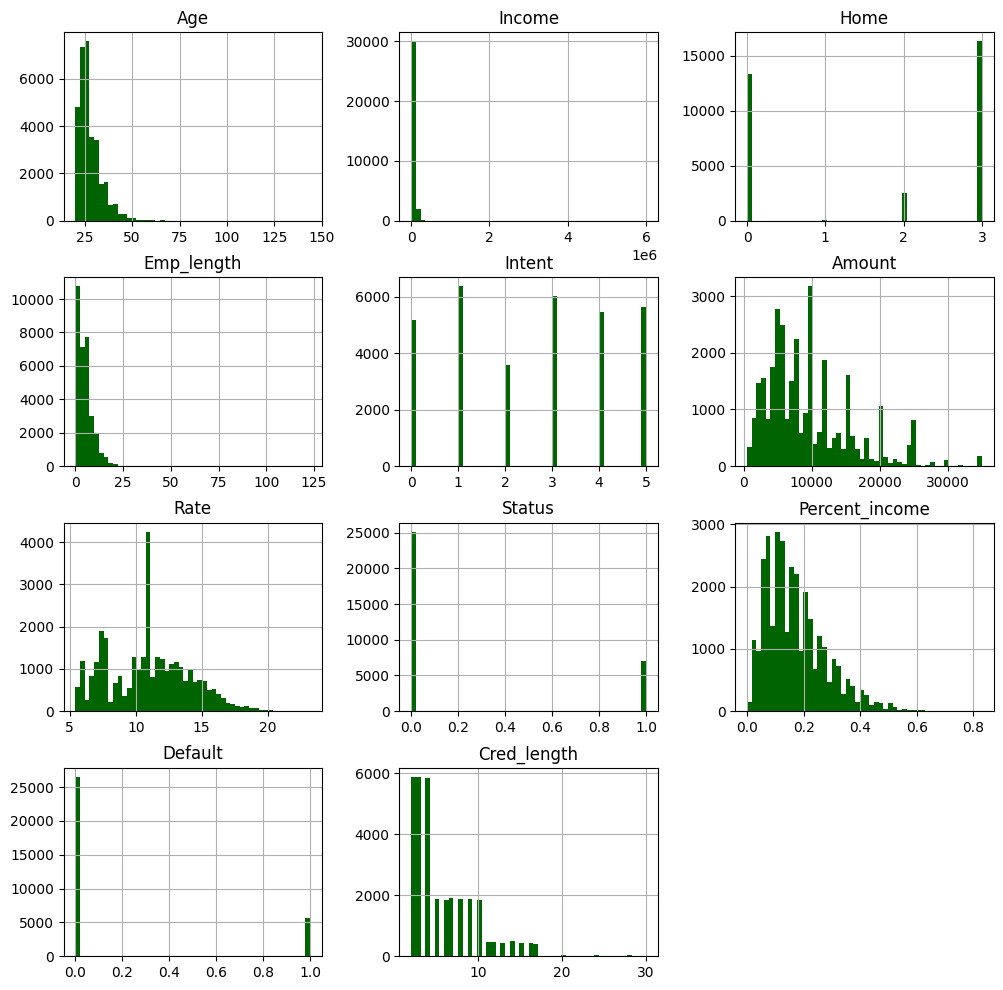

In [31]:
df.hist(bins=50, figsize=(12,12),color='darkgreen')
plt.show()

###  Finding correlation

In [32]:
corre = df.corr()
corre

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
Age,1.000000,0.173383,-0.032967,0.160960,0.035762,0.050570,0.010315,-0.023780,-0.042190,0.004535,0.859297
Income,0.173383,1.000000,-0.202999,0.132636,0.001450,0.265067,0.000916,-0.145565,-0.254472,-0.003621,0.117238
Home,-0.032967,-0.202999,1.000000,-0.228893,0.010032,-0.131281,0.132411,0.211112,0.141571,0.063055,-0.026432
Emp_length,0.160960,0.132636,-0.228893,1.000000,0.020243,0.111972,-0.053237,-0.081630,-0.052903,-0.028070,0.143287
Intent,0.035762,0.001450,0.010032,0.020243,1.000000,-0.004930,-0.001374,-0.066128,0.000650,-0.004194,0.035840
Amount,0.050570,0.265067,-0.131281,0.111972,-0.004930,1.000000,0.139721,0.106098,0.573037,0.039603,0.041760
Rate,0.010315,0.000916,0.132411,-0.053237,-0.001374,0.139721,1.000000,0.320778,0.114317,0.476949,0.014265
Status,-0.023780,-0.145565,0.211112,-0.081630,-0.066128,0.106098,0.320778,1.000000,0.380029,0.179627,-0.017477
Percent_income,-0.042190,-0.254472,0.141571,-0.052903,0.000650,0.573037,0.114317,0.380029,1.000000,0.036500,-0.031225
Default,0.004535,-0.003621,0.063055,-0.028070,-0.004194,0.039603,0.476949,0.179627,0.036500,1.000000,0.003768


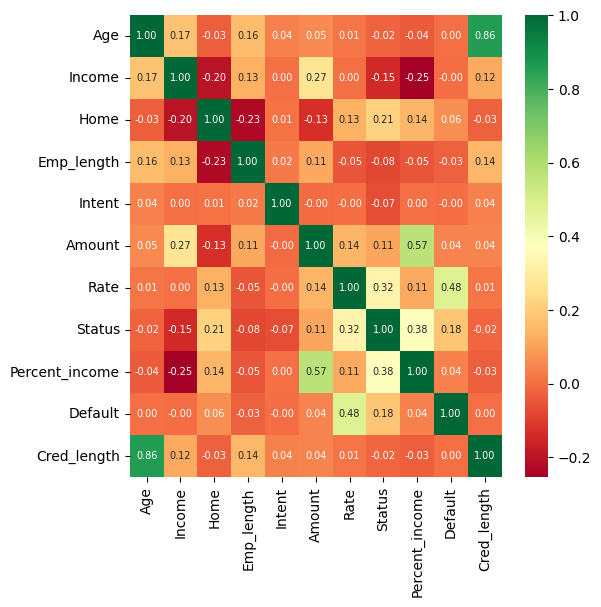

In [33]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corre, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 7}, ax=ax)
plt.show()

### Modelling

In [34]:
X = df.drop('Status',axis=1)
X

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Percent_income,Default,Cred_length
0,22,59000,3,123.0,4,35000,16.02,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,0.57,0,3
3,23,65500,3,4.0,3,35000,15.23,0.53,0,2
4,24,54400,3,8.0,3,35000,14.27,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,5800,13.16,0.11,0,30
32577,54,120000,0,4.0,4,17625,7.49,0.15,0,19
32578,65,76000,3,3.0,2,35000,10.99,0.46,0,28
32579,56,150000,0,5.0,4,15000,11.48,0.10,0,26


In [35]:
y = df['Status']
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: Status, Length: 32251, dtype: int64

In [36]:
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size=0.3)

In [37]:
X_train.shape

(22575, 10)

In [38]:
X_test.shape

(9676, 10)

In [40]:
y_train.shape

(22575,)

In [41]:
y_test.shape

(9676,)

## Decision Tree

In [42]:
model1 = DecisionTreeClassifier()
model1

DecisionTreeClassifier()

In [43]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
# Predicting on training data
p1 = model1.predict(X_test)
p1

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

### Checking accuracy

In [45]:
print('Accuracy of Decision tree is',accuracy_score(p1,y_test))

Accuracy of Decision tree is 0.8707110376188507


<Axes: >

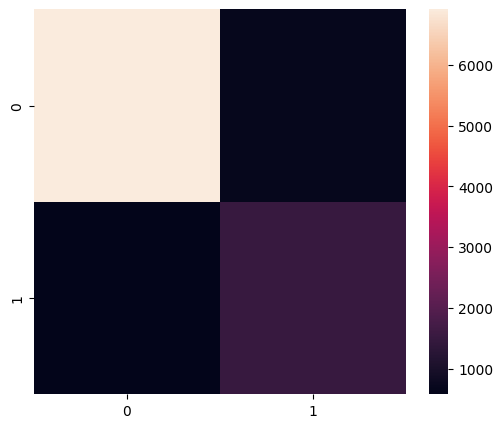

In [65]:
c1 = confusion_matrix(y_test,p1)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(c1,ax=ax)

## Random Forest

In [46]:
model2 = RandomForestClassifier(n_estimators=200)
model2

RandomForestClassifier(n_estimators=200)

In [47]:
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [48]:
p2 = model2.predict(X_test)
p2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Checking accuracy

In [49]:
# Way 1
print('Accuracy of Random forest',accuracy_score(p2,y_test))

Accuracy of Random forest 0.913290615957007


In [50]:
# Way 2
model2.score(X_test,y_test)

0.913290615957007

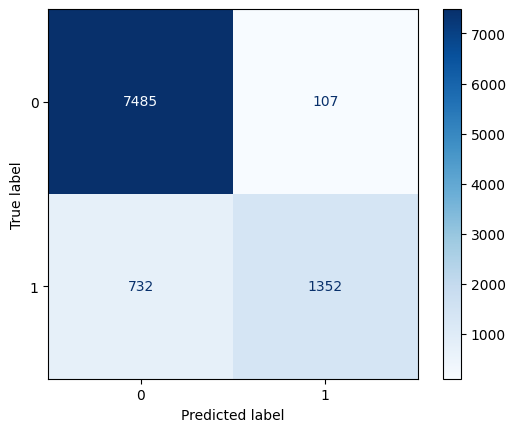

In [51]:
# cm = confusion_matrix(y_test , p2)
# sns.heatmap(cm , annot=True)
# plt.xlabel("Truth")
# plt.ylabel("Predicted")

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, p2, cmap = plt.cm.Blues, normalize = None, display_labels = ['0', '1'])

In [52]:
# # Way 3
# # Through Cross validation score
# model22 = cross_val_score(estimator=model2,X=X_train,y=y_train,cv=10) # cv determines k kitni dafa cross validation karni hai
# model22.mean()

## Logistic Regression

In [53]:
model3 = LogisticRegression()
model3

LogisticRegression()

In [54]:
model3.fit(X_train,y_train)

LogisticRegression()

In [55]:
p3 = model3.predict(X_test)
p3

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Checking accuracy

In [56]:
model3.score(X_test,y_test)

0.80549813972716

In [57]:
print('Accuracy of Logistic Regression is',accuracy_score(p3,y_test))

Accuracy of Logistic Regression is 0.80549813972716


<Axes: >

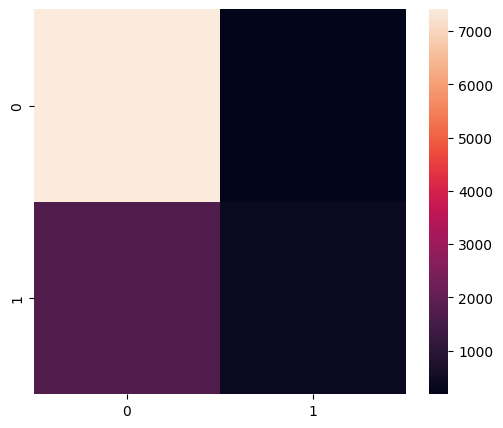

In [67]:
c3 = confusion_matrix(y_test,p3)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(c3,ax=ax)

### SVM

In [58]:
model4 = SVC()
model4

SVC()

In [59]:
model4.fit(X_train,y_train)

SVC()

In [60]:
p4 = model4.predict(X_test)
p4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Checking accuracy 

In [61]:
model4.score(X_test,y_test)

0.8132492765605622

In [62]:
print("Accuracy of SVM is",accuracy_score(p4,y_test))

Accuracy of SVM is 0.8132492765605622


<Axes: >

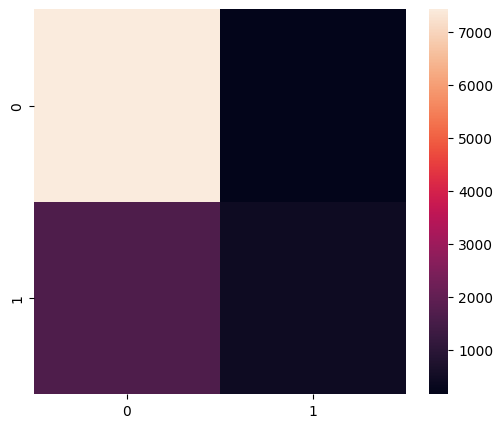

In [68]:
c4 = confusion_matrix(y_test,p4)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(c4,ax=ax)

In [71]:
# Way3 
# Using GridSearchCV
model44 = GridSearchCV(model4,{
    'C': [0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [ ]:
# model44.fit(X_train,y_train)
# model44.best_params_ # it will tell the best parameters
# m = SVC(C=0.1,gamma=0.1,kernel=linear) # now using those best parameters to see the difference b/w previous score and new score
# m.fit(X_train,y_train)
# m.score(X_test)